In [1]:
from google.colab import files
uploaded = files.upload()

Saving Final Transactions.csv to Final Transactions.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Final Transactions.csv", header = "infer")
data.head(15)

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
5,5,5,2023-01-01 00:10:45,568,8803,401.17,645,0,0,0
6,6,6,2023-01-01 00:11:30,2803,5490,938.54,690,0,0,0
7,7,7,2023-01-01 00:11:44,4684,2486,206.53,704,0,0,0
8,8,8,2023-01-01 00:11:53,4128,8354,253.47,713,0,0,0
9,9,9,2023-01-01 00:13:44,541,6212,555.63,824,0,0,0


In [ ]:
data.shape
data["TX_FRAUD"]

0          0
1          0
2          1
3          0
4          0
          ..
1754150    0
1754151    0
1754152    0
1754153    0
1754154    0
Name: TX_FRAUD, Length: 1754155, dtype: int64

<ipython-input-5-ca276af173c3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['TX_FRAUD'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-5-ca276af173c3>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['TX_FRAUD'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


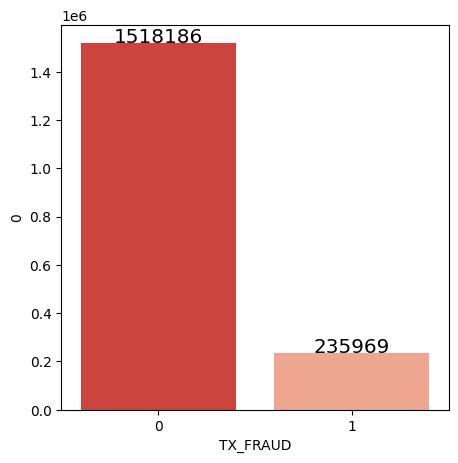

In [ ]:
plt.figure(figsize=(5,5))
target_group = data.groupby('TX_FRAUD').size().reset_index()
pal = sns.color_palette("Reds", len(target_group))
rank = target_group["TX_FRAUD"].argsort().argsort()
g = sns.barplot(x = target_group['TX_FRAUD'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['TX_FRAUD'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [ ]:
print("No. of missing values: ")
for val in data.columns:
  print("\t%s: %d" % (val, data[val].isna().sum()))

No. of missing values: 
	Unnamed: 0: 0
	TRANSACTION_ID: 0
	TX_DATETIME: 0
	CUSTOMER_ID: 0
	TERMINAL_ID: 0
	TX_AMOUNT: 0
	TX_TIME_SECONDS: 0
	TX_TIME_DAYS: 0
	TX_FRAUD: 0
	TX_FRAUD_SCENARIO: 0


In [ ]:
data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [ ]:
drop_cols = ['TRANSACTION_ID','TX_DATETIME','CUSTOMER_ID','TERMINAL_ID','TX_TIME_SECONDS','TX_TIME_DAYS', 'TX_FRAUD_SCENARIO']
data = data.drop(drop_cols, axis = 1)

In [ ]:
data.head()

,Unnamed: 0,TX_AMOUNT,TX_FRAUD
0,0,533.07,0
1,1,808.56,0
2,2,1442.94,1
3,3,620.65,0
4,4,490.66,0


In [ ]:
dup_data = data.duplicated()
print("No. of duplicated rows: %d" % (dup_data.sum()))

No. of duplicated rows: 0


#**Using SMOTE Sampling Algorithm (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Splitting data into: features (X) and target (y)
X = data.drop(columns=['TX_FRAUD'])
y = data['TX_FRAUD']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
'''
from imblearn.over_sampling import SMOTE

# Specify the desired ratio after resampling
# For example, if you want the minority class to have twice as many samples as the majority class:
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)
'''

'\nfrom imblearn.over_sampling import SMOTE\n\n# Specify the desired ratio after resampling\n# For example, if you want the minority class to have twice as many samples as the majority class:\ndesired_ratio = 0.5  # ratio of minority to majority class\n\n# Initialize SMOTE with the desired ratio\nsmoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)\n\n# Apply SMOTE to the training data to balance the classes\nX_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)\n'

In [ ]:
'''
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#^^^X_train, X_test, y_train, y_test contain the preprocessed data ready for training/testing

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

pd.DataFrame(precision_recall)
'''

'\n#Splitting the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)\n\n#^^^X_train, X_test, y_train, y_test contain the preprocessed data ready for training/testing\n\nsmoteAlg = SMOTE(random_state=42)\nX_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)\n\n# Training the classifier\nclf_balanced = RandomForestClassifier(random_state=42)\nclf_balanced.fit(X_train_bal, y_train_bal)\n\n# Predictions\ny_pred = clf_balanced.predict(X_test)\n\n# Step 4: Record precision and recall\nprecision_recall = classification_report(y_test, y_pred, output_dict=True)\n\npd.DataFrame(precision_recall)\n'

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
'''
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
'''
# Apply SMOTE to the training data to balance the classes
smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

# Display precision and recall as a DataFrame
pd.DataFrame(precision_recall)


In [ ]:
import numpy as np

# Count the occurrences of each class in y_train_bal
class_counts = np.bincount(y_train_bal)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")

Class 0: 1063124 samples
Class 1: 1063124 samples


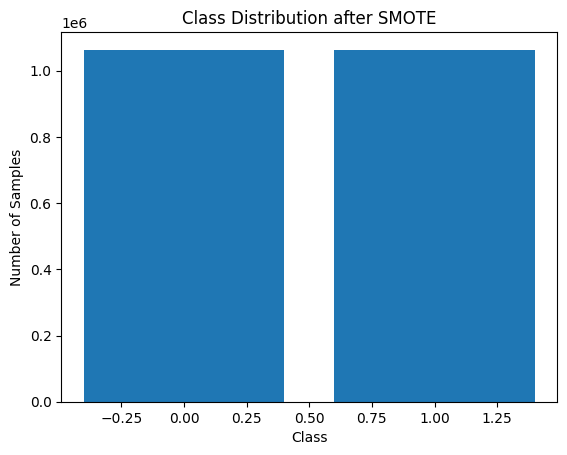

In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# How the confusion matrix matrix is calculated
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# The confusion matrix prints like this:
# [True Positive (TP), False Negative (FN)]
# [False Positive (FP), True Negative (TN)]

Confusion Matrix:
[[453584   1478]
 [  2426  68759]]


In [ ]:
from sklearn import svm
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

In [ ]:
data.shape

(1754155, 4)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Splitting data into: features (X) and target (y)
X = data.drop(columns=['TX_FRAUD'])
y = data['TX_FRAUD']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
16360/43854 [==========>...................] - ETA: 58s - loss: 324.3515 - accuracy: 0.7672